In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文标题 
plt.rcParams['axes.unicode_minus'] = False # 正常显示正负号

In [2]:
f = pd.ExcelFile('D:/附件 建筑工地、道路与混凝土搅拌站设置的相关数据表.xls')
df = pd.read_excel(f, sheet_name=[0])
xuqiu = df[0]['混凝土需求量(方)']
data = df[0].loc[:,['工地的横坐标X', '工地的纵坐标Y' ]]

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(data)
data_std = standardScaler.transform(data)

kme = KMeans(n_clusters=20, n_jobs=-1, max_iter=500)

kme.fit(data_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=20, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
x = Series(kme.labels_)
x.index = data.index
data['所属类别'] = x
data['需求'] = xuqiu
data['编号'] = df[0]['工地的编号']
g = list(data.groupby(data['所属类别']))

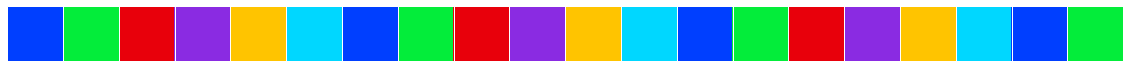

In [7]:
sc = sns.color_palette('bright', 20)
sns.palplot(sc)
sns.set_palette(sc)

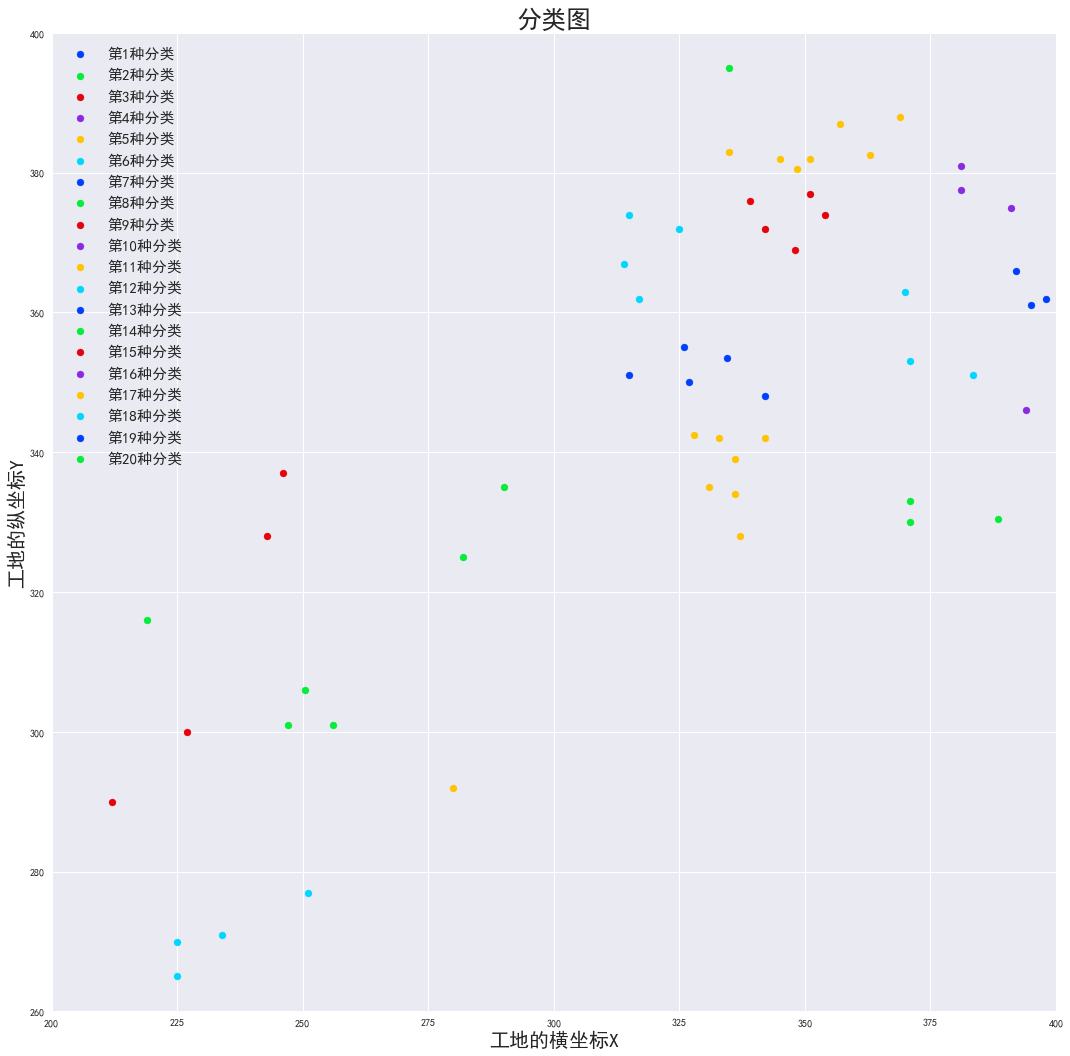

In [8]:
plt.figure(figsize=(18,18))
plt.axis([200,400,260,400])
for i, df_new in g:
    plt.scatter(df_new['工地的横坐标X'],df_new['工地的纵坐标Y'],label='第'+str(i+1)+'种分类')
plt.legend(fontsize=15)
plt.xlabel('工地的横坐标X',fontsize=20)
plt.ylabel('工地的纵坐标Y',fontsize=20)
plt.title('分类图',fontsize=25)
plt.show()

In [9]:
zd = DataFrame( standardScaler.inverse_transform(kme.cluster_centers_))

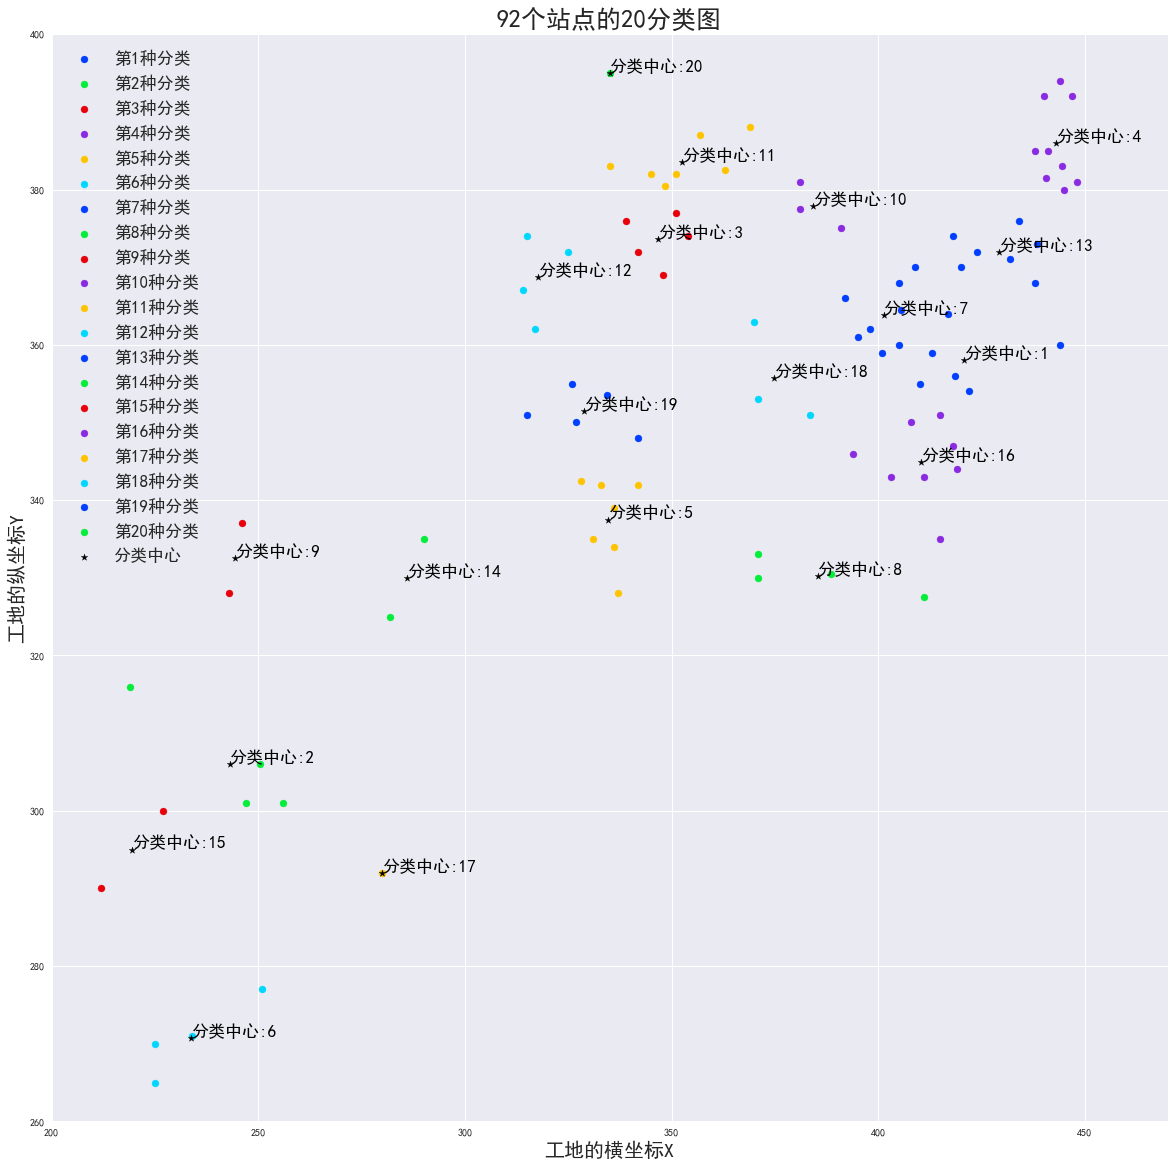

In [10]:
plt.figure(figsize=(20,20))
plt.axis([200,470,260,400])
for i, df_new in g:
    plt.scatter(df_new['工地的横坐标X'],df_new['工地的纵坐标Y'],label='第'+str(i+1)+'种分类',marker='o')
plt.scatter(zd[0],zd[1],color='k',marker='*',label='分类中心')
i = 1
for x,y in zd.values:
    plt.text(x+0.15,y+0.15,'分类中心:'+str(i),color='k',fontsize=17)
    i+=1
plt.legend(fontsize=17)
plt.xlabel('工地的横坐标X',fontsize=20)
plt.ylabel('工地的纵坐标Y',fontsize=20)
plt.title('92个站点的20分类图',fontsize=25)
plt.show()

In [11]:
# 求出92个中距离分类中心最近的点
from math import sqrt
zhongxin1 = []
XY = data.loc[:,['工地的横坐标X','工地的纵坐标Y','编号']]
for x,y in zd.values:
    min = 999999999999
    ind = -1
    for xy in XY.values:
        luli = sqrt((x-xy[0])**2 + (y-xy[1])**2)
        if min > luli:
            min = luli
            ind = xy[2]
    zhongxin1.append(ind)

In [12]:
zhongxin1

[74.0,
 11.0,
 53.0,
 89.0,
 35.0,
 22.0,
 66.0,
 40.0,
 28.0,
 4.0,
 59.0,
 30.0,
 18.0,
 10.0,
 24.0,
 43.0,
 14.0,
 55.0,
 33.0,
 61.0]

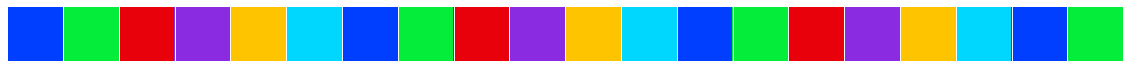

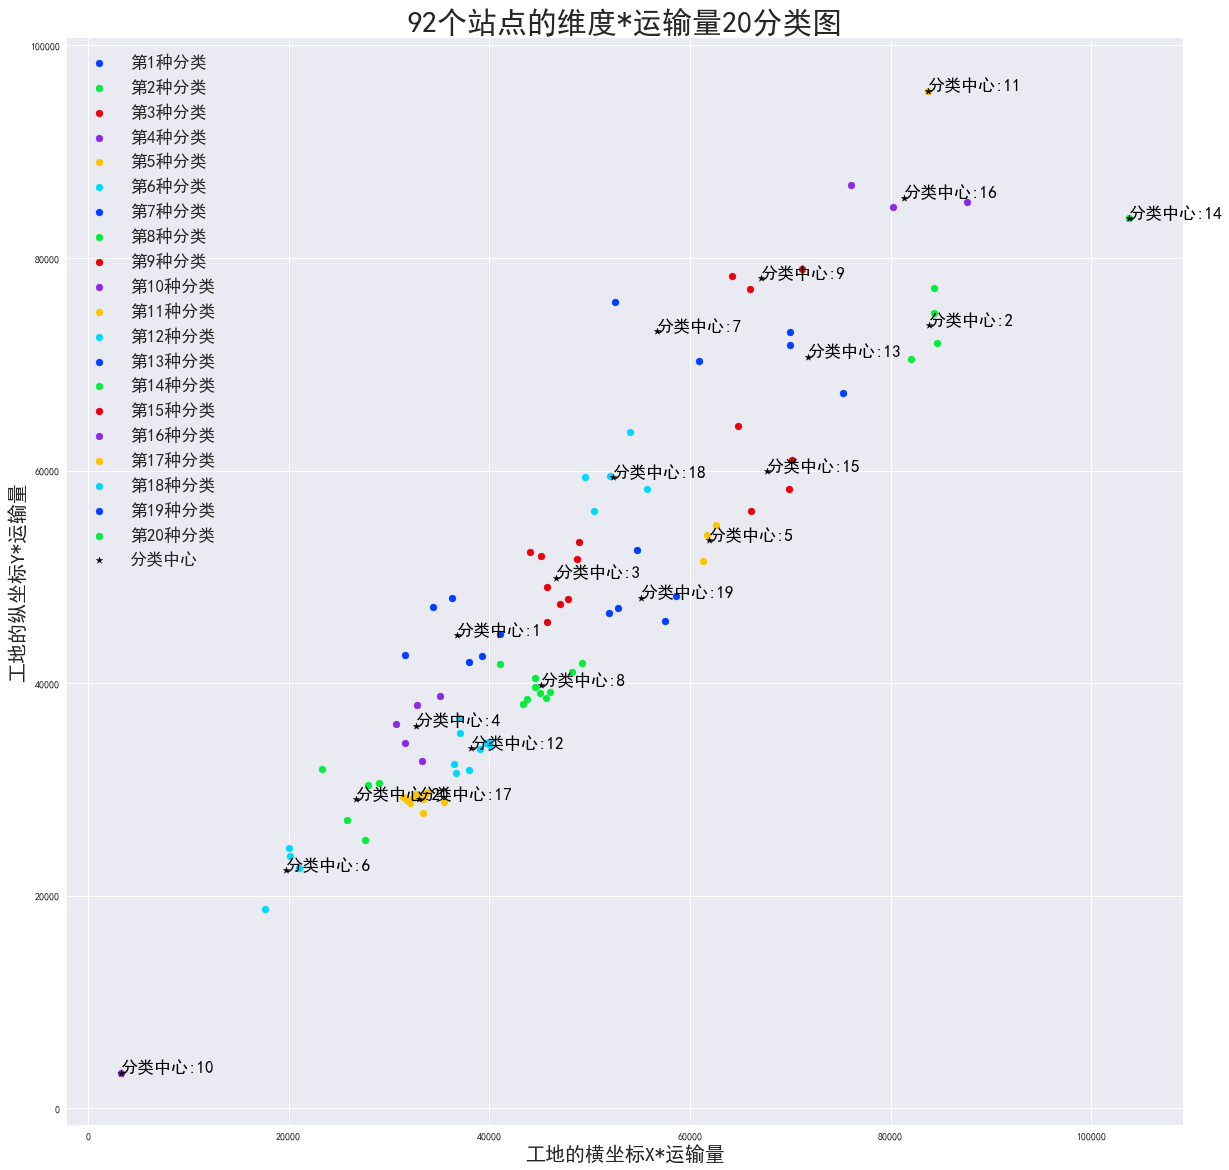

In [18]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文标题 
plt.rcParams['axes.unicode_minus'] = False # 正常显示正负号

# 获取数据
f = pd.ExcelFile('D:/附件 建筑工地、道路与混凝土搅拌站设置的相关数据表.xls')
df = pd.read_excel(f, sheet_name=[0])
xuqiu = df[0]['混凝土需求量(方)']
data = df[0].loc[:,['工地的横坐标X', '工地的纵坐标Y' ]]
# 维度*运输量
data['工地的横坐标X'] = data['工地的横坐标X']*xuqiu
data['工地的纵坐标Y'] = data['工地的纵坐标Y']*xuqiu

# 标准化数据
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(data)
data_std = standardScaler.transform(data)

# 聚类分析
kme = KMeans(n_clusters=20, n_jobs=-1, max_iter=500)
kme.fit(data_std)

# 聚类中心点
zd = DataFrame( standardScaler.inverse_transform(kme.cluster_centers_))

# 分类
x = Series(kme.labels_)
x.index = data.index
data['所属类别'] = x
data['需求'] = xuqiu
data['编号'] = df[0]['工地的编号']
g = list(data.groupby(data['所属类别']))

# 调色板
sc = sns.color_palette('bright', 20)
sns.palplot(sc)
sns.set_palette(sc)

# 绘图            
plt.figure(figsize=(20,20))
for i, df_new in g:
    plt.scatter(df_new['工地的横坐标X'],df_new['工地的纵坐标Y'],label='第'+str(i+1)+'种分类',marker='o')
plt.scatter(zd[0],zd[1],color='k',marker='*',label='分类中心')
i = 1
for x,y in zd.values:
    plt.text(x+0.15,y+0.15,'分类中心:'+str(i),color='k',fontsize=17)
    i+=1
plt.legend(fontsize=17)
plt.xlabel('工地的横坐标X*运输量',fontsize=20)
plt.ylabel('工地的纵坐标Y*运输量',fontsize=20)
plt.title('92个站点的维度*运输量20分类图',fontsize=30)
plt.savefig('3.png',dpi=200)
plt.show()

In [19]:
# 求出92个中距离分类中心最近的点
from math import sqrt
zhongxin = []
XY = data.loc[:,['工地的横坐标X','工地的纵坐标Y','编号']]
for x,y in zd.values:
    min = 999999999999
    ind = -1
    for xy in XY.values:
        luli = abs(x-xy[0]) +  abs(y-xy[1])
        if min > luli:
            min = luli
            ind = xy[2]
    zhongxin.append(ind)

In [20]:
ZX = np.array(zhongxin,dtype='int')

In [21]:
ZX

array([50, 20, 33, 22, 89, 52, 12, 69, 30, 37,  6, 83,  9, 17,  1,  8, 78,
       47, 85, 51])

In [22]:
ZX.sort()

In [23]:
ZX

array([ 1,  6,  8,  9, 12, 17, 20, 22, 30, 33, 37, 47, 50, 51, 52, 69, 78,
       83, 85, 89])